# Reading the Dataset

In [1]:
import glob
from Bio import SeqIO
import pandas as pd
all_files = glob.glob('datasets/*.fasta')
all_files.sort()
row          = 0
cols         = ['sequence', 'Family name', 'File name']
df           = pd.DataFrame(columns = cols)

for file_ in all_files:
    with open(file_, mode='r') as handle:
        for record in SeqIO.parse(handle, 'fasta'):
            sequence    = record.seq
            df.loc[row, 'sequence']    = str(sequence).upper()
            df.loc[row, 'Family name'] = file_.split('_')[0].split('datasets/')[1]
            df.loc[row, 'File name']   = ': '.join(file_.split('_')).split('.fasta')[0].split('datasets/')[1]
            row                       += 1
print(df.head(2))
print(df.tail(2))

                                            sequence Family name     File name
0  ACTTAAGTACCTTATCTATCTACAGATAGAAAAGTTGCTTTTTAGA...           1  1: HCoV-229E
1  CTTAAAGAATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGA...           1  1: HCoV-NL63
                                             sequence Family name    File name
32  ATAGCTGCGTGATACACACACGCAGCTTACGGGTTTCATACTGCTC...         out  out: NyongT
33  NNTGGCGGACGTGTGACATCACCGTTCGCCTTTCTTGGATCCCTTG...         out   out: RossT


# Fitting nTreeClus

In [2]:
import nTreeClus
from tqdm import tqdm
n_clusters = len(df['Family name'].unique())
def convert_label_to_values (column):
    unique_lables    = list(column.unique())
    n_lables         = len(unique_lables)
    map_dict         = dict(zip(unique_lables, range(n_lables)))
    return column.map(map_dict)

labels = list(convert_label_to_values(df['Family name']))

model      = nTreeClus.nTreeClus(list(df.sequence), n=100, ntree=10, method="All", verbose=1, C=n_clusters)
model.nTreeClus()
    
model.performance(Ground_Truth = labels)

Matrix Segmentation (Splitting based on window size): 100%|██████████| 34/34 [00:03<00:00, 10.87it/s]


one-hot encoding + x/y train
Fit DT
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage
Cutting The Tree
Fit DT + POSITION
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage
Cutting The Tree
Fit RF
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage
Cutting The Tree
Fit RF + POSITION
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage
Cutting The Tree


,F1S,ARS,RS,Pur,Sil,1NN
DT,0.81,0.892,0.96,0.883,0.766,0.853
RF,0.81,0.892,0.96,0.883,0.767,0.853
DT_p,0.81,0.892,0.96,0.883,0.778,0.883
RF_p,0.81,0.892,0.96,0.883,0.778,0.883


# Dendrogram

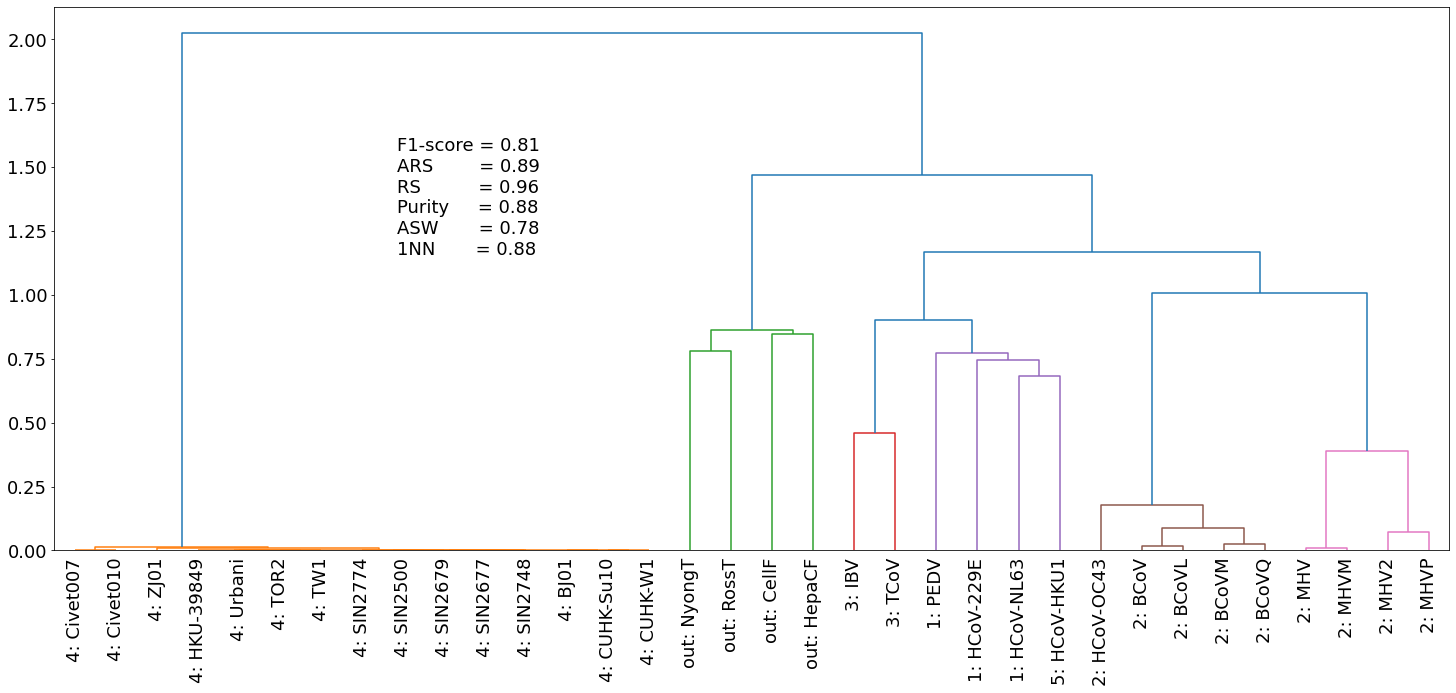

In [35]:
from matplotlib import pyplot as plt
fig, ax = model.plot('DT_position', df['File name'].values, color_threshold =0.88, linkage_method= 'ward', annotate=True, xy=(50, 1.7), save=True)
plt.show()

# Executing time (sec.)

In [3]:
print(f"""
      running_time Matrix Segmentation: {model.running_timeSegmentation},
      running_time DT: {model.running_timeDT},
      running_time DT_p: {model.running_timeDT_p},
      running_time RF: {model.running_timeRF},
      running_time RF_p: {model.running_timeRF_p}.
      """)


      running_time Matrix Segmentation: 14,
      running_time DT: 81,
      running_time DT_p: 85,
      running_time RF: 265,
      running_time RF_p: 267.
      


In [6]:
import platform,json,psutil,logging,cpuinfo

def getSystemInfo():
    try:
        info={}
        info['platform']=platform.system()
        info['platform-release']=platform.release()
        info['platform-version']=platform.version()
        info['architecture']=platform.machine()
        info['processor']=f"Processor: {cpuinfo.get_cpu_info()['brand_raw']}"
        info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

{'platform': 'Linux',
 'platform-release': '4.9.0-11-amd64',
 'platform-version': '#1 SMP Debian 4.9.189-3 (2019-09-02)',
 'architecture': 'x86_64',
 'processor': 'Processor: Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz',
 'ram': '126 GB'}